## 모델 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/image_recognition/data/
# ㅇ

/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition/data


In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1wsoYtPFk4Ia_qXoKCcoi51yEuHK6jzdT/image_recognition/data'

In [ ]:
idx2label = {0: '무증상', 1: '결막염', 2: '궤양성각막질환', 3: '백내장', 4: '비궤양성각막질환',
               5: '색소침착성각막염', 6: '안검내반증', 7: '안검염', 8: '안검종양', 9: '유루증', 10: '핵경화'}

In [ ]:
import pandas as pd
# 데이터 로드
img_1 = pd.read_pickle('./sample/t_u/결막염_images_224_200.pickle')
img_2 = pd.read_pickle('./sample/t_u/궤양성각막질환_images_224_200.pickle')
img_3 = pd.read_pickle('./sample/t_u/백내장_images_224_200.pickle')
img_4 = pd.read_pickle('./sample/t_u/비궤양성각막질환_images_224_200.pickle')
img_5 = pd.read_pickle('./sample/t_u/색소침착성각막염_images_224_200.pickle')
img_6 = pd.read_pickle('./sample/t_u/안검내반증_images_224_200.pickle')
img_7 = pd.read_pickle('./sample/t_u/안검염_images_224_200.pickle')
img_8 = pd.read_pickle('./sample/t_u/안검종양_images_224_200.pickle')
img_9 = pd.read_pickle('./sample/t_u/유루증_images_224_200.pickle')
img_10 = pd.read_pickle('./sample/t_u/핵경화_images_224_200.pickle')


img_m_1 = pd.read_pickle('./sample/t_m/결막염_images_224_100.pickle')
img_m_2 = pd.read_pickle('./sample/t_m/궤양성각막질환_images_224_100.pickle')
img_m_3 = pd.read_pickle('./sample/t_m/백내장_images_224_100.pickle')
img_m_4 = pd.read_pickle('./sample/t_m/비궤양성각막질환_images_224_100.pickle')
img_m_5 = pd.read_pickle('./sample/t_m/색소침착성각막염_images_224_100.pickle')
img_m_6 = pd.read_pickle('./sample/t_m/안검내반증_images_224_100.pickle')
img_m_7 = pd.read_pickle('./sample/t_m/안검염_images_224_100.pickle')
img_m_8 = pd.read_pickle('./sample/t_m/안검종양_images_224_100.pickle')
img_m_9 = pd.read_pickle('./sample/t_m/유루증_images_224_100.pickle')
img_m_10 = pd.read_pickle('./sample/t_m/핵경화_images_224_100.pickle')


print(img_1.shape, img_2.shape, img_3.shape, img_4.shape, img_5.shape, img_6.shape,img_7.shape, img_8.shape, img_9.shape, img_10.shape) 
print(img_m_1.shape, img_m_2.shape, img_m_3.shape, img_m_4.shape, img_m_5.shape, img_m_6.shape, img_m_7.shape, img_m_8.shape, img_m_9.shape, img_m_10.shape)

(100, 224, 224, 3) (200, 224, 224, 3) (300, 224, 224, 3) (200, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3)
(100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3)


In [ ]:
import numpy as np
img = np.concatenate((img_1, img_2, img_3, img_4, img_5, img_6,img_7, img_8, img_9, img_10, img_m_1, img_m_2, img_m_3, img_m_4, img_m_5, img_m_6, img_m_7, img_m_8, img_m_9, img_m_10))
img.shape

(2400, 224, 224, 3)

In [ ]:
label = np.concatenate((np.full(100, 1),np.full(200, 2),np.full(300, 3),np.full(200, 4),np.full(100, 5),np.full(100, 6),np.full(100, 7),np.full(100, 8),np.full(100, 9),np.full(100, 10),np.full(1000, 0)))
label.shape

(2400,)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(img, label,stratify = label , test_size=0.2)


In [ ]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

## train_test_split

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((1920, 224, 224, 3), (1920,), (480, 224, 224, 3), (480,))

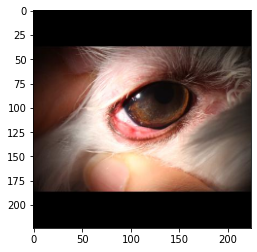

In [ ]:
import cv2
plt.imshow(cv2.cvtColor(train_images[3], cv2.COLOR_BGR2RGB))

In [ ]:
train_labels[3]

7

## Zero Centering

In [ ]:
# 훈련 세트의 평균 값을 계산합니다.
mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
mean_img = mean(train_images)


In [ ]:
mean_img.shape

(224, 224, 3)

In [ ]:
# 훈련 세트와 테스트 세트에 제로 센터링을 적용합니다.
train_zero_centered = train_images - mean_img
test_zero_centered = test_images - mean_img

In [ ]:
len(train_zero_centered)

1920

In [ ]:
test_zero_centered.shape

(480, 224, 224, 3)

ValueError: ignored

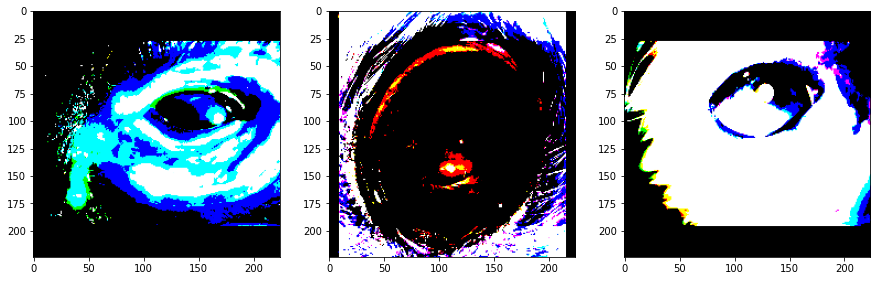

In [ ]:
plt.figure(figsize=(15,5))
# 현재 이미지의 인덱스, zc_img 변수에는 현재 이미지의 값

for idx, zc_img in enumerate(train_zero_centered):
  plt.subplot(1,3,idx+1)
  plt.imshow(zc_img)

In [ ]:
import pickle

with open('X_train_zero_centered.pickle', 'wb') as f:
    pickle.dump(train_zero_centered, f)

In [ ]:
with open('test_images.pickle', 'wb') as f:
    pickle.dump(test_zero_centered, f)

In [ ]:
with open('train_labels.pickle', 'wb') as f:
    pickle.dump(train_labels, f)

In [ ]:
with open('test_labels.pickle', 'wb') as f:
    pickle.dump(test_labels, f)

In [ ]:
import pandas as pd

train_images = pd.read_pickle('X_train_zero_centered.pickle')
test_images = pd.read_pickle('test_images.pickle')
train_labels = pd.read_pickle('train_labels.pickle')
test_labels = pd.read_pickle('test_labels.pickle')

train_images, test_images, train_labels, test_labels

(array([[[[-30.68697917, -33.875     , -36.86041667],
          [-30.99270833, -34.17395833, -37.175     ],
          [-31.30364583, -34.515625  , -37.5296875 ],
          ...,
          [-32.95052083, -36.33020833, -39.15989583],
          [-32.61614583, -35.9859375 , -38.79895833],
          [-32.415625  , -35.75572917, -38.5609375 ]],
 
         [[-30.81354167, -34.00625   , -37.01510417],
          [-31.04791667, -34.23802083, -37.27864583],
          [-31.29270833, -34.50885417, -37.5625    ],
          ...,
          [-32.93072917, -36.32395833, -39.18125   ],
          [-32.575     , -35.97760417, -38.809375  ],
          [-32.41770833, -35.7765625 , -38.60104167]],
 
         [[-31.16927083, -34.39322917, -37.4515625 ],
          [-31.30520833, -34.53072917, -37.59947917],
          [-31.55833333, -34.79322917, -37.89635417],
          ...,
          [-33.10364583, -36.52708333, -39.4203125 ],
          [-32.965625  , -36.36510417, -39.2203125 ],
          [-32.84270833, -36.23

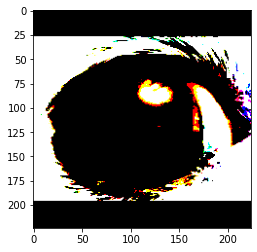

In [ ]:
plt.imshow(train_images[5])